In [20]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
import json
players_mlb = {}
with open("../Data/mlb_players.json", 'r') as json_file:
    players_mlb:dict = json.load(json_file)

In [23]:
all_batters = {k:players_mlb[k] for k in players_mlb.keys() if players_mlb[k]["Player type"]==2 and len(players_mlb[k]["batter_stats"])}

In [24]:
def batter_seasson_avg_Calc(stat, games, seasson_factor=164,r=0):
    player_factor = games/seasson_factor
    return round((stat/player_factor),r)

In [25]:
batter_in_hall= {k:all_batters[k] for k in all_batters.keys() if  all_batters[k]['HoF']}
batters_more_2_seassons= {k:all_batters[k] for k in all_batters.keys() if  all_batters[k]['total_seasons']>2}

In [26]:
print(len(all_batters))
print(len(batters_more_2_seassons))

12971
7370


In [27]:
def bat_stat_comparision(groups, stat, labels, title, avg=False):
    g = []
    problems_count = 0
    for group in groups:
        g1 = []
        for k in group.keys():
            b_stats = group[k]["batter_stats"]
            not_ok = isinstance(b_stats[stat]['summary'], str)
            if not_ok:
                problems_count+=1
                continue
            if avg:
                if b_stats.get('G') == None:
                    print(group[k])
                games = b_stats['G']["summary"]
                g1.append(batter_seasson_avg_Calc(b_stats[stat]['summary'], games))
            else:
                g1.append(b_stats[stat]['summary'])
        g.append(g1)
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    meanlineprops = dict(linestyle='--', linewidth=1, color='yellow')
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.boxplot(g,vert=True, medianprops=medianprops, meanprops=meanlineprops, meanline=True, showmeans=True, patch_artist=True,labels=labels)
    fig.suptitle(title)
    ax1.yaxis.grid(True)
    print(f"Number of players with not stats in {stat}:{problems_count}")
    plt.show()

Number of players with not stats in H:0


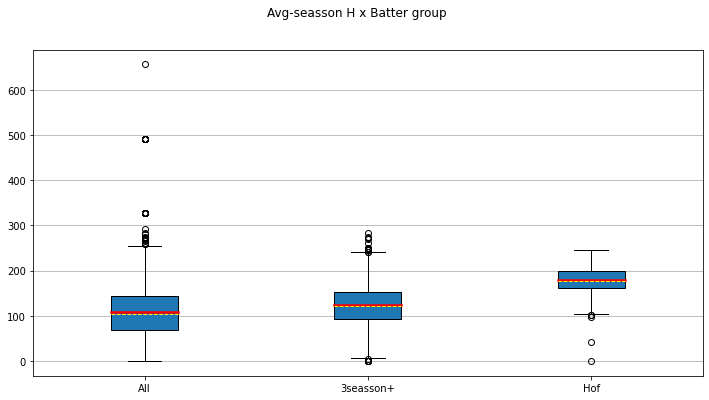

In [28]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "H", ['All', '3seasson+', 'Hof'], "Avg-seasson H x Batter group", True)

Number of players with not stats in HR:0


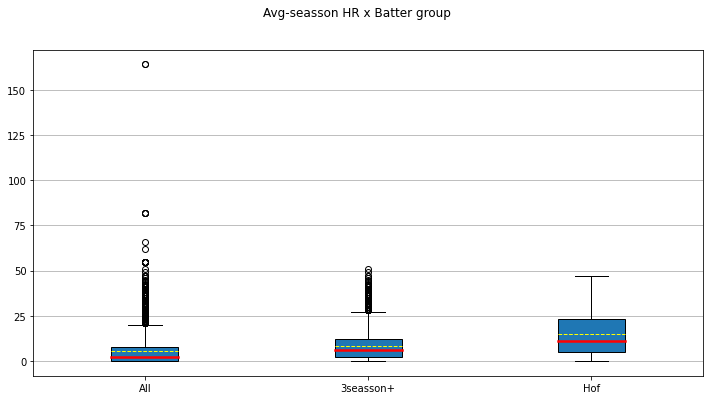

In [30]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "HR", ['All', '3seasson+', 'Hof'], "Avg-seasson HR x Batter group", True)

Number of players with not stats in RBI:183


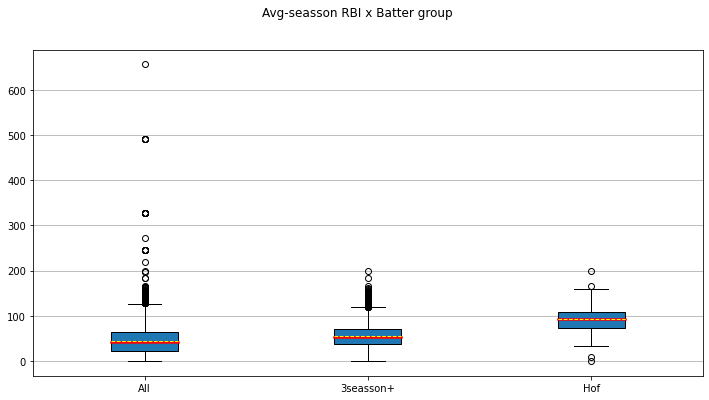

In [31]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "RBI", ['All', '3seasson+', 'Hof'], "Avg-seasson RBI x Batter group", True)

Number of players with not stats in R:0


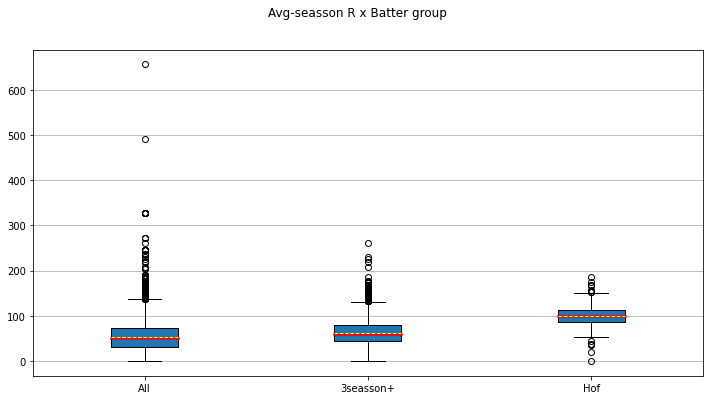

In [44]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "R", ['All', '3seasson+', 'Hof'], "Avg-seasson R x Batter group", True)

Number of players with not stats in SLG:156


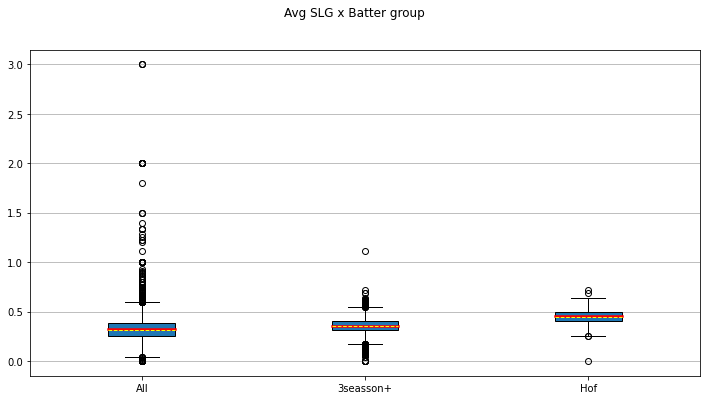

In [42]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "SLG", ['All', '3seasson+', 'Hof'], "Avg SLG x Batter group")

Number of players with not stats in OPS:156


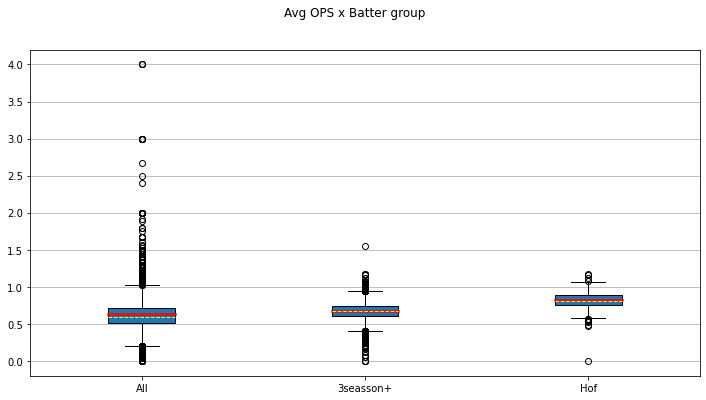

In [41]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "OPS", ['All', '3seasson+', 'Hof'], "Avg OPS x Batter group")

Number of players with not stats in OPS+:156


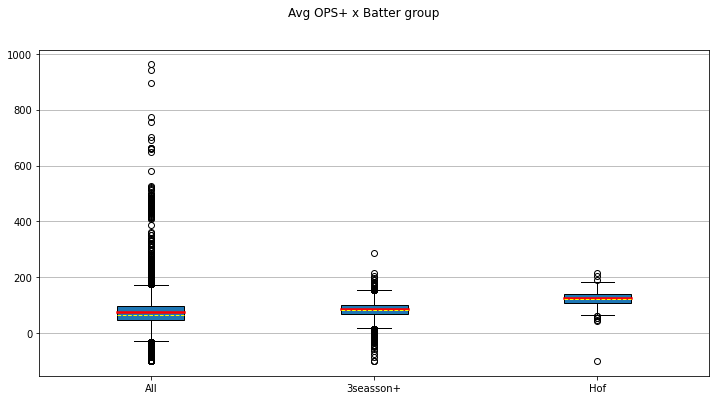

In [40]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "OPS+", ['All', '3seasson+', 'Hof'], "Avg OPS+ x Batter group")

Number of players with not stats in WAA:98


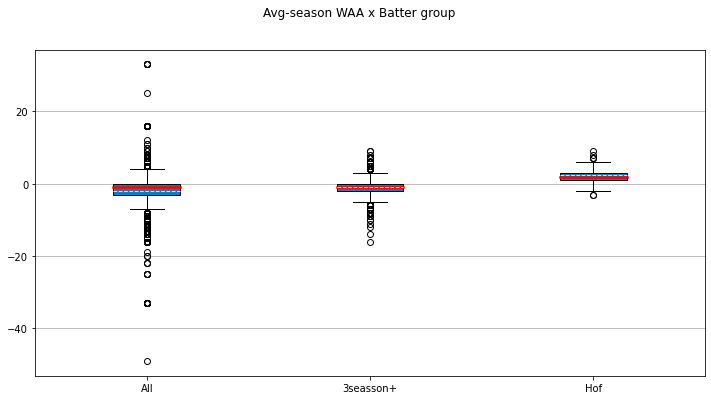

In [39]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "WAA", ['All', '3seasson+', 'Hof'], "Avg-season WAA x Batter group", True)

Number of players with not stats in WAR:283


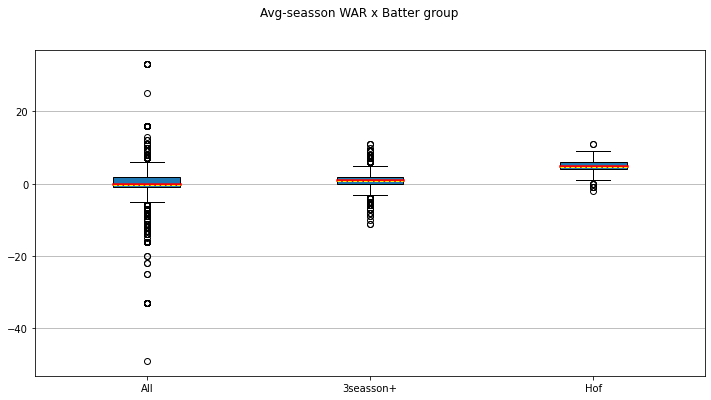

In [38]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "WAR", ['All', '3seasson+', 'Hof'], "Avg-seasson WAR x Batter group", True)

Number of players with not stats in RAA:98


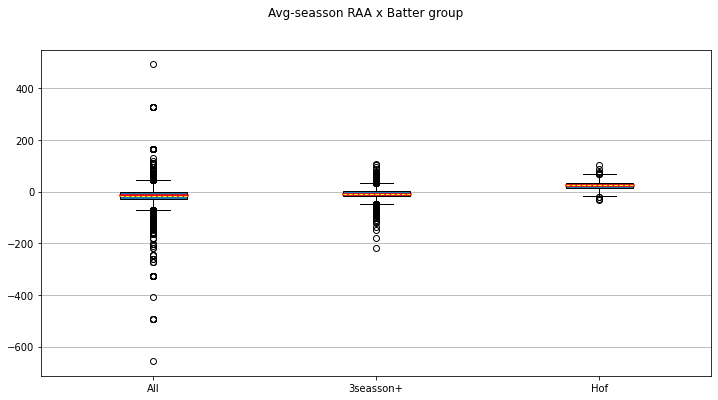

In [37]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "RAA", ['All', '3seasson+', 'Hof'], "Avg-seasson RAA x Batter group", True)

Number of players with not stats in AB:0


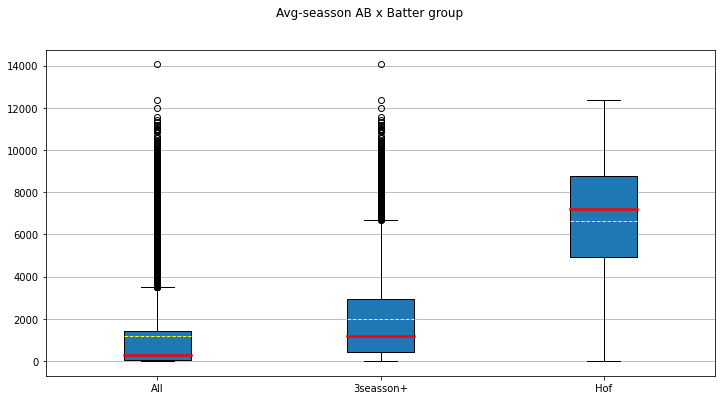

In [36]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "AB", ['All', '3seasson+', 'Hof'], "Avg-seasson AB x Batter group")

Number of players with not stats in PA:0


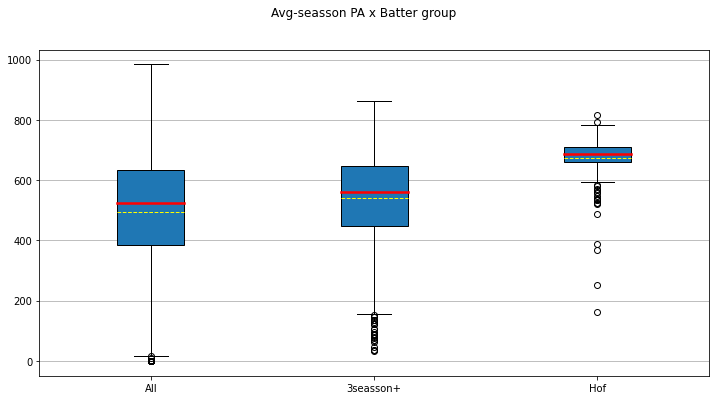

In [35]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "PA", ['All', '3seasson+', 'Hof'], "Avg-seasson PA x Batter group", True)

Number of players with not stats in TB:0


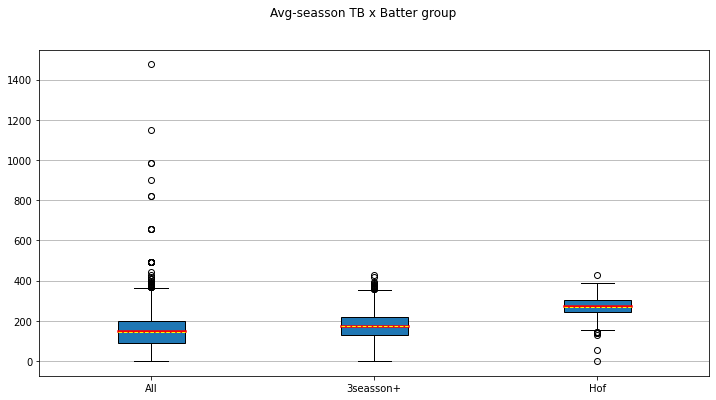

In [34]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "TB", ['All', '3seasson+', 'Hof'], "Avg-seasson TB x Batter group", True)

Number of players with not stats in CS:5589


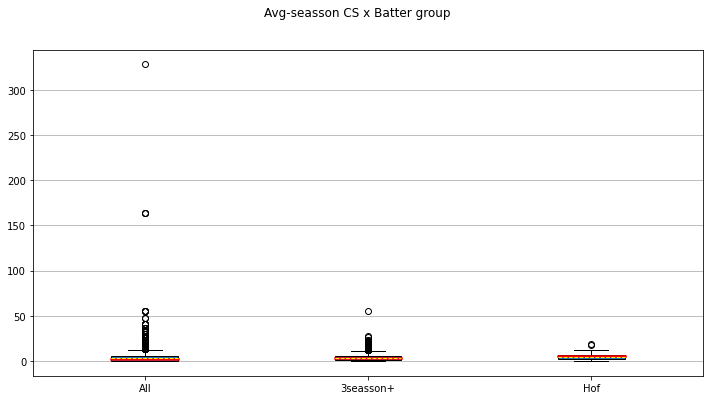

In [33]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "CS", ['All', '3seasson+', 'Hof'], "Avg-seasson CS x Batter group", True)

Number of players with not stats in SB:469


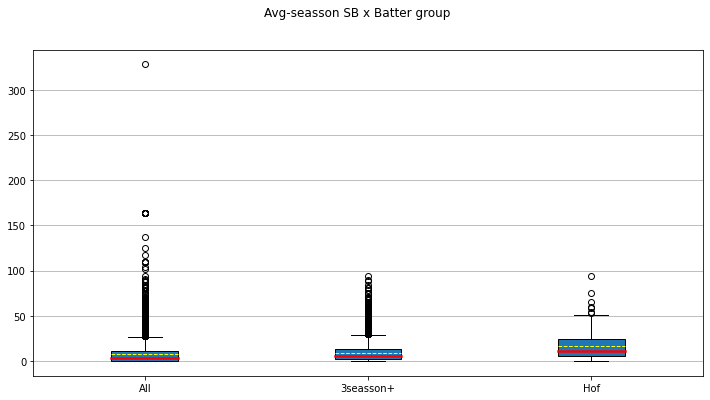

In [32]:
bat_stat_comparision([all_batters, batters_more_2_seassons, batter_in_hall], "SB", ['All', '3seasson+', 'Hof'], "Avg-seasson SB x Batter group", True)